In [2]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sn


import numpy as np
%matplotlib inline

In [3]:
def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

In [14]:
csv_list = []

for csv in glob.glob("results/28600/stateful/*.csv"):
    csv_list.append(csv)

# sort by momentum - [2], by max acc - [7]
csv_list = sorted(csv_list, key=lambda v: v.split('_')[2], reverse=True)

In [15]:
csv_list

['results/28600/stateful/record_7e-4_0.90_1.4657_1.0000_1.9014_0.6250_0.6500.csv',
 'results/28600/stateful/record_1e-4_0.90_1.5868_0.9269_2.1003_0.3700_0.4500.csv',
 'results/28600/stateful/record_4e-4_0.90_1.4700_1.0000_1.9591_0.5700_0.5900.csv',
 'results/28600/stateful/record_1e-3_0.90_1.4649_1.0000_1.9064_0.5850_0.6100.csv']

In [16]:
def plot_csv():
    for csv in csv_list:
        df = pd.read_csv(csv)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))

        title = 'SGD(lr=%s, momentum=%.2f, nesterov=True)\n\
            loss: %.4f - accuracy: %.4f - val_loss: %.4f - val_accuracy: %.4f' \
                % (format_e(float(csv.split('_')[1])), float(csv.split('_')[2]),
                   float(csv.split('_')[3]), float(csv.split('_')[4]),
                   float(csv.split('_')[5]), float(csv.split('_')[6]))
                    # csv.split('_')[7].split('.csv')[0] - best accuracy

        fig.set_facecolor("white")
        fig.suptitle((title), fontsize=16, color='black', backgroundcolor='white')

        ax1.plot(df['accuracy'])
        ax1.plot(df['val_accuracy'])
        ax1.set_xticks(np.arange(0, len(df['accuracy']) + 10, 20))
        ax1.set_yticks(np.arange(0, 1.1, 0.1))
        ax1.tick_params(axis='both', colors='black')

        ax1.set_ylabel('Acuracy')
        ax1.set_xlabel('Epochs')
        ax1.yaxis.label.set_color('black')
        ax1.yaxis.label.set_fontsize(14)
        ax1.xaxis.label.set_color('black')
        ax1.xaxis.label.set_fontsize(14)

        ax1.grid(axis = 'both')
        ax1.legend(['train', 'validation'], loc='upper left')

        ax2.plot(df['loss'])
        ax2.plot(df['val_loss'])
        ax2.set_xticks(np.arange(0, len(df['loss']) + 10, 20))
        ax2.set_yticks(np.arange(0, max(df['loss']) + 0.5, 0.3))
        ax2.tick_params(axis='both', colors='black')

        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epochs')
        ax2.yaxis.label.set_color('black')
        ax2.yaxis.label.set_fontsize(14)
        ax2.xaxis.label.set_color('black')
        ax2.xaxis.label.set_fontsize(14)

        ax2.grid(axis = 'both')
        ax2.legend(['train', 'validation'], loc='upper left')

        # fig.show()

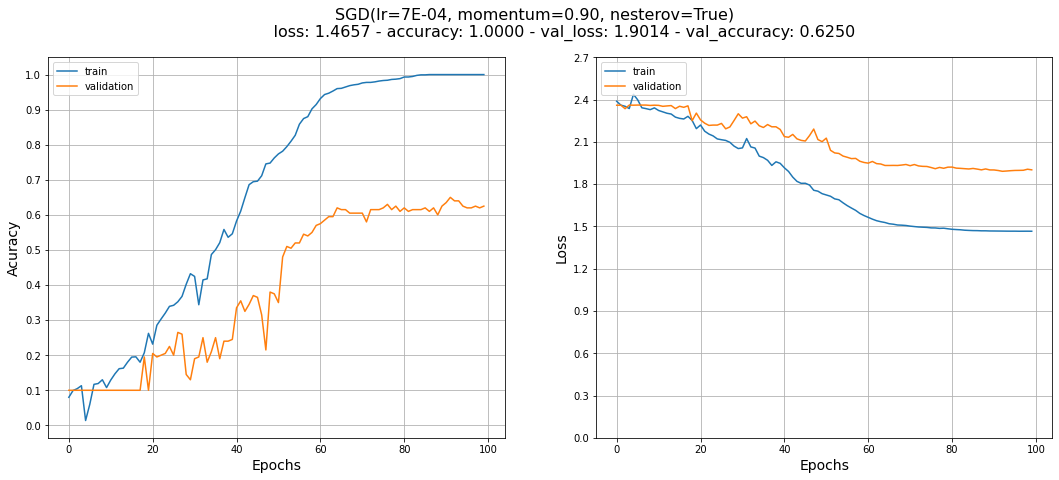

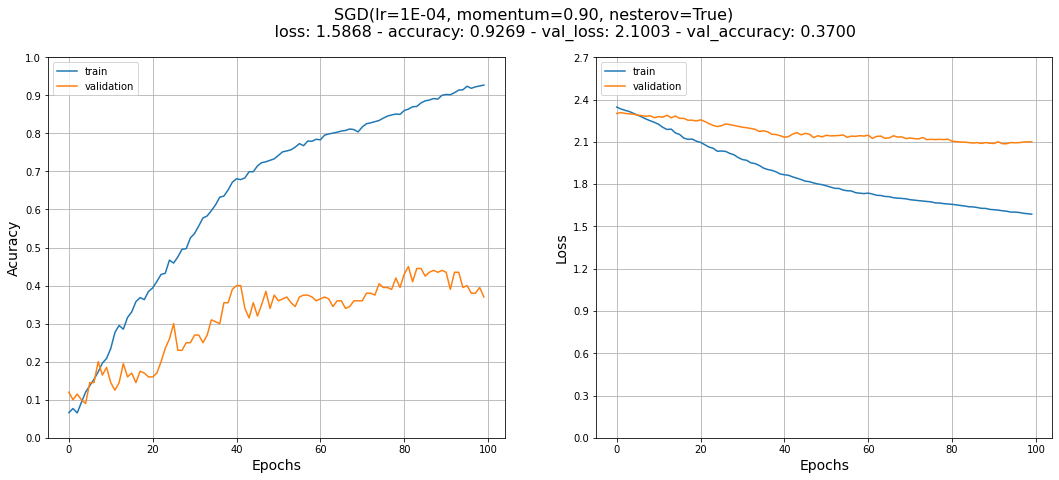

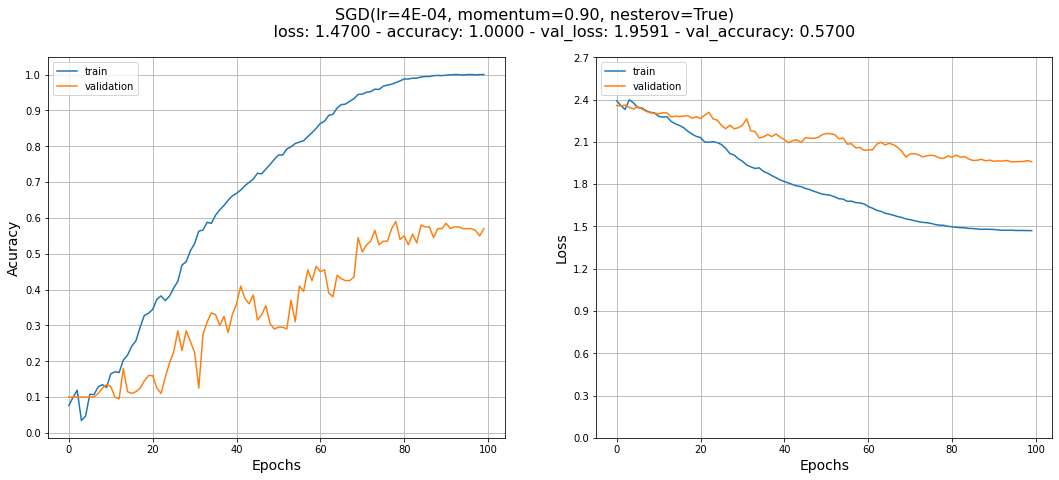

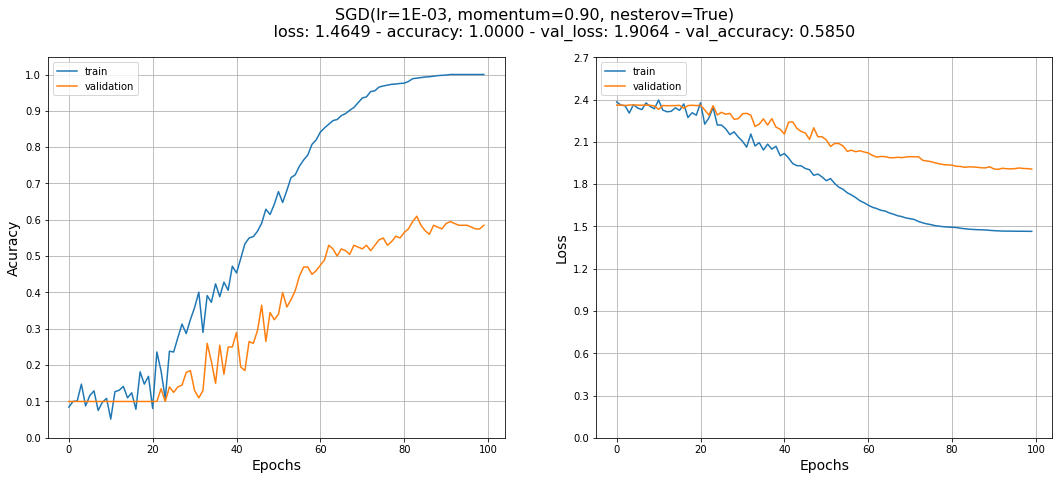

In [17]:
plot_csv()